In [1]:
import keras.datasets as ds
import matplotlib.pyplot as plt
from keras.models import Sequential,Model
from keras.layers import Conv2D, MaxPooling2D, ReLU, Flatten, Dense, Dropout
import keras
import numpy as np
import pandas as pd
from keras.models import load_model
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
image_index = 101
input_shape = (28,28,1)
num_classes = 10
epochs = 5
batch_size = 64

In [122]:

(x_train, y_train), (x_test, y_test) = ds.mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [30]:
print(x_train1[image_index].shape)

(28, 28)


7


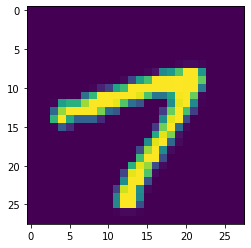

In [29]:
print(y_train1[image_index])
plt.imshow(x_train1[image_index])

In [123]:
y_train_data = y_train
y_test_data = y_test
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
print(x_train.shape, x_test.shape)


(60000, 28, 28, 1) (10000, 28, 28, 1)


In [124]:
from keras.utils import np_utils
y_train = keras.utils.np_utils.to_categorical(y_train,num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test,num_classes)
print(x_test[image_index].shape)

(28, 28, 1)


In [125]:
y_test = keras.utils.np_utils.to_categorical(y_test,num_classes)

In [50]:
y_test.shape

(10000, 10)

In [23]:
x_train[image_index].size

784

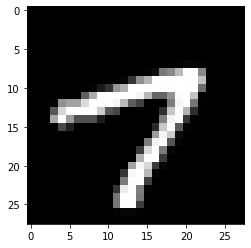

In [22]:
plt.imshow(x_train[image_index],cmap = "gray")

In [126]:

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255
x_test2= x_test/255


In [128]:
x_test= x_test2

In [127]:
x_train_data = x_train.reshape(x_train.shape[0], x_train.shape[1],x_train.shape[2],1 )
x_test_data = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2],1)

In [42]:
model = Sequential(name = 'MNIST')

model.add(Conv2D(16, (3,3), input_shape = input_shape, activation= 'relu', name = 'Block1_Conv'))
model.add(MaxPooling2D((2,2), name= 'Block1_MaxPool'))

model.add(Conv2D(32, (3,3), activation= 'relu', name = 'Block2_Conv'))
model.add(MaxPooling2D((2,2), name = 'Block2_MaxPool'))

model.add(Flatten(name = 'Layer1_Flattened_Input')) #input layer
model.add(Dense(32, activation= 'relu', name = 'Layer2_Hidden')) #hidden layer
model.add(Dense(num_classes, activation= 'softmax', name = 'Layer3_Output')) #output layer

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [43]:
model.summary()

Model: "MNIST"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Block1_Conv (Conv2D)         (None, 26, 26, 16)        160       
_________________________________________________________________
Block1_MaxPool (MaxPooling2D (None, 13, 13, 16)        0         
_________________________________________________________________
Block2_Conv (Conv2D)         (None, 11, 11, 32)        4640      
_________________________________________________________________
Block2_MaxPool (MaxPooling2D (None, 5, 5, 32)          0         
_________________________________________________________________
Layer1_Flattened_Input (Flat (None, 800)               0         
_________________________________________________________________
Layer2_Hidden (Dense)        (None, 32)                25632     
_________________________________________________________________
Layer3_Output (Dense)        (None, 10)                330   

In [44]:
model.fit(x = x_train, y = y_train, epochs = epochs)

Epoch 1/5
1875/1875 [==============================] - 55s 13ms/step - loss: 0.4235 - accuracy: 0.8689
Epoch 2/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0657 - accuracy: 0.9793
Epoch 3/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0471 - accuracy: 0.9859
Epoch 4/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0349 - accuracy: 0.9891
Epoch 5/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0294 - accuracy: 0.9912


In [52]:


model.evaluate(x = x_test_data, y = y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0379 - accuracy: 0.9874: 0s - loss: 0.0404 - accu


[0.03785616531968117, 0.9873999953269958]

In [53]:
model.save('mnist_model.h5')

In [54]:
model = load_model('mnist_model.h5')

In [55]:
model.summary()

Model: "MNIST"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Block1_Conv (Conv2D)         (None, 26, 26, 16)        160       
_________________________________________________________________
Block1_MaxPool (MaxPooling2D (None, 13, 13, 16)        0         
_________________________________________________________________
Block2_Conv (Conv2D)         (None, 11, 11, 32)        4640      
_________________________________________________________________
Block2_MaxPool (MaxPooling2D (None, 5, 5, 32)          0         
_________________________________________________________________
Layer1_Flattened_Input (Flat (None, 800)               0         
_________________________________________________________________
Layer2_Hidden (Dense)        (None, 32)                25632     
_________________________________________________________________
Layer3_Output (Dense)        (None, 10)                330   

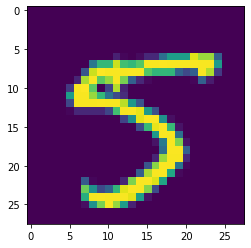

In [58]:
plt.imshow(x_test[image_index+1])

In [59]:
pred = model.predict_classes(x_test[image_index+1].reshape(1,28,28,1))
print(pred)
prob = model.predict_proba(x_test[image_index+1].reshape(1,28,28,1))
print(prob)

[5]
[[1.0462603e-14 1.3742861e-15 5.1670027e-18 1.6090046e-06 9.9683013e-15
  9.9999845e-01 2.2313653e-13 8.4445845e-13 4.9326612e-08 8.4559799e-09]]


In [115]:
def get_conv_filters():
    filters = []
    print("Convolution Layers and Filters")
    for layer in model.layers:
        if ('Conv' in layer.name):
            filter, bias = layer.get_weights()
            print(filter.shape)
            fmin, fmax = filter.min(), filter.max()
            filter = (filter - fmin)/(fmax - fmin)
            (a,b,c,d) = filter.shape
            filter = filter.reshape(c,a,b,d)
            print(layer.name, filter.shape)
            filters.append(filter)
    return filters

In [103]:
def plot_filters(filters, conv_layer_num):
    conv_layer_num = conv_layer_num-1
    filter = filters[conv_layer_num]
    (a,b,c,d) = filter.shape
    print(a,b,c,d)
    filter= filter[0,:b,:c,:d].reshape(1,b,c,d)  #printing the first featuremap only, reshaping into 4d and sending to plot_images
    print(filter.shape)
    plot_images(filter, name = "Filter")
    return

In [106]:
filters = get_conv_filters()

Convolution Layers and Filters
(3, 3, 1, 16)
Block1_Conv (1, 3, 3, 16)
(3, 3, 16, 32)
Block2_Conv (16, 3, 3, 32)


In [165]:
def plot_images(all_values, name = " "):
  #plotting all images in a grid of 8 columns and n rows
  #values is a 4d array with a for number of inputs, (b,c) for image size of feature maps and d for the number of feature maps
  num_inputs = all_values.shape[0]
  feature_maps = all_values.shape[-1]
  nrows = int(feature_maps/8)
  ncols = int(feature_maps/nrows)
  for values in all_values:
    i = 0  #re-initialize the featuremap count to 0 for the next input
    fig, ax = plt.subplots(nrows = nrows, ncols = ncols, figsize = (15,15), subplot_kw={'xticks':[], 'yticks':[]})
    print(nrows, ncols)
    for j in range(nrows):  #number of rows 
      for k in range(ncols): #number of columns
        ax[j][k].imshow(values[:,:,i]) 
        ax[j][k].set_title(name + " " + str(i+1))
        i = i+1
    plt.show()
    plt.close()

1 3 3 16
(1, 3, 3, 16)
16
2 8


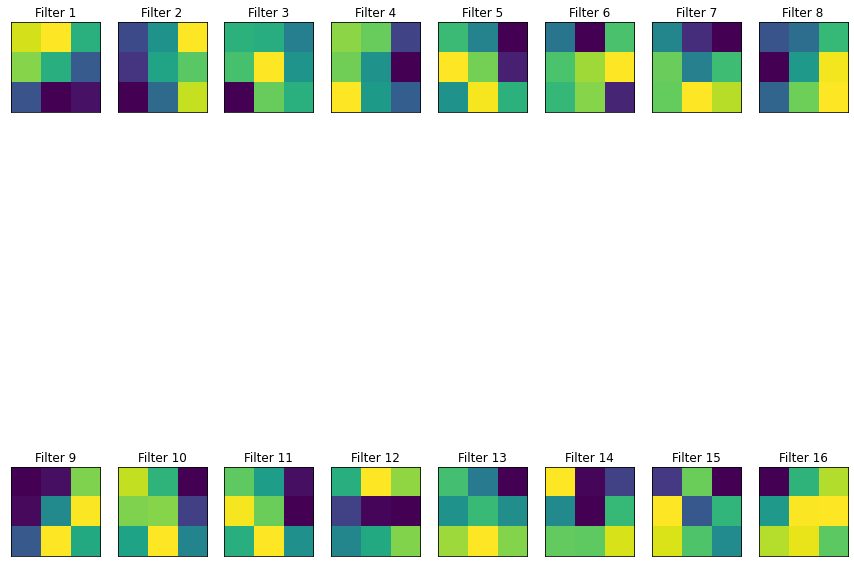

In [164]:
plot_filters(filters = filters, conv_layer_num= 1)

In [118]:
model.input
layer_outputs = [layer.output for layer in model.layers]
layer_outputs[1]

<KerasTensor: shape=(None, 13, 13, 16) dtype=float32 (created by layer 'Block1_MaxPool')>

In [119]:
def extract_digit_data(x_data, y_data):
    index = {}
    x = {}
    y = {}
    for digit in range(10):
        index[digit] = [indx for indx in range(len(y_data)) if y_data[indx]== digit]
        x[digit] = np.array([x_data[indx] for indx in index[digit]])
        y[digit] = np.array([y_data[indx] for indx in index[digit]])
    return index,x,y

In [141]:

def call_act(layer_num, digit, num_input_images):
  layer_num = layer_num
  digit = digit
  num_input_images = num_input_images
  start_from = 200  #of all digits you need not always go for the first ones in the array
  input = x[digit][start_from:start_from+num_input_images]
  values = get_act(layer_num, input)
  return values

In [167]:
def get_act(layer_num, input):
  #get activations at layer_num for the input. Input should be a 4d array (a,b,c,d). For just one input image a=1. (b,c) image sizes. d=1
  #returns two arrays neurons, values for layers 5,6,7 and feature maps values for layers 1 to 4
  layer_outputs = [layer.output for layer in model.layers]
  activation_model = Model(inputs=model.input, outputs = layer_outputs[layer_num-1])
  activations = activation_model.predict(input)
  if (layer_num >= 5):
    values = activations.T
    neurons = np.array(range(values.shape[0]))
    #plt.plot(neurons,values)
    plot_lines(neurons, values)
    return values
  else:
    values = activations
    print(values.shape)
    plot_images(values, name = "Feature map") 
    return values


In [143]:

def plot_lines(neurons,values):
  fig, ax = plt.subplots(figsize = (20,5))
  ax.plot(neurons, values)
  ax.set(xlabel = 'Neurons', ylabel = 'Activation values', xlim = [neurons[0], neurons[-1]])
  ax.grid(axis = 'both')
  ax.set_xticks(neurons)
  return

In [129]:
index, x, y = extract_digit_data(x_test_data, y_test_data)

(1, 11, 11, 32)
feature maps 32
4 8


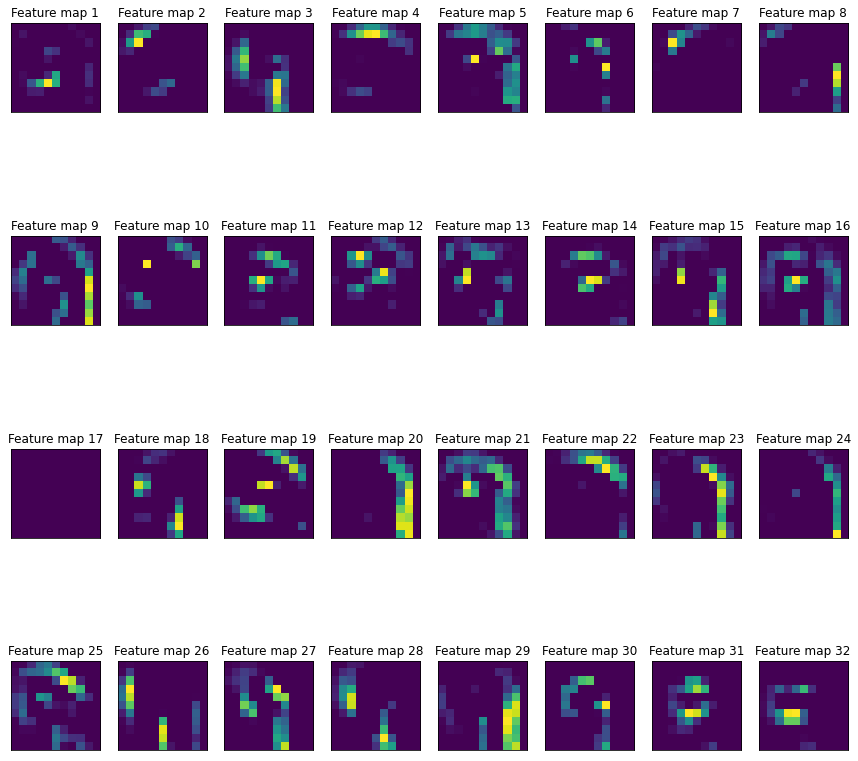

In [170]:
values2 = call_act(layer_num = 3, digit = 9, num_input_images = 1)

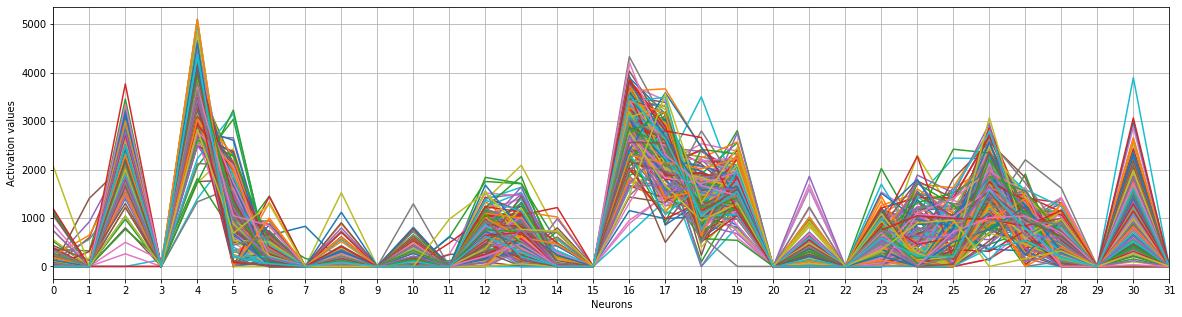

In [172]:
values12 = call_act(layer_num = 6, digit = 9, num_input_images = 200)

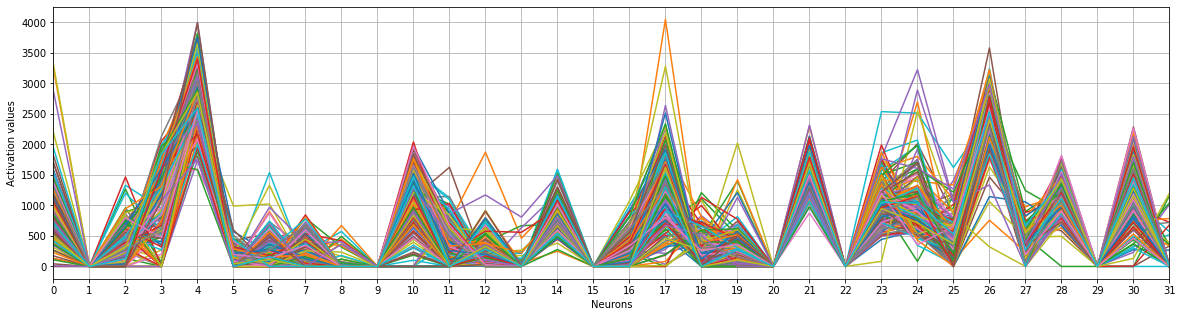

In [173]:
values12 = call_act(layer_num = 6, digit = 1, num_input_images = 200)

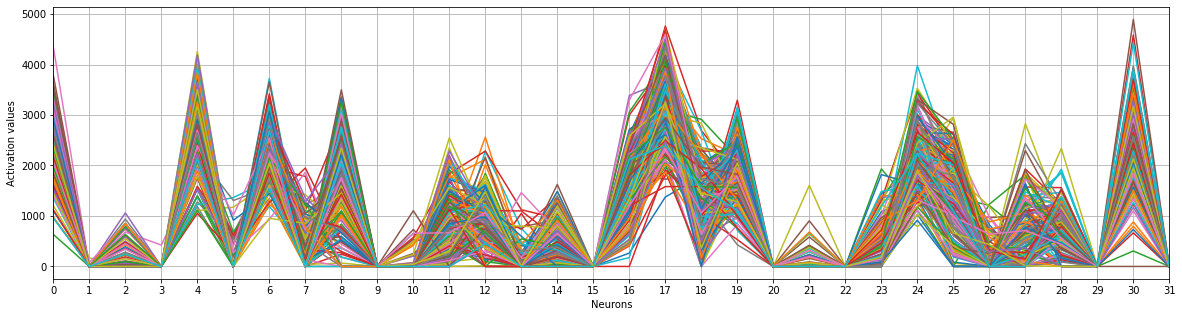

In [174]:
values12 = call_act(layer_num = 6, digit = 3, num_input_images = 200)

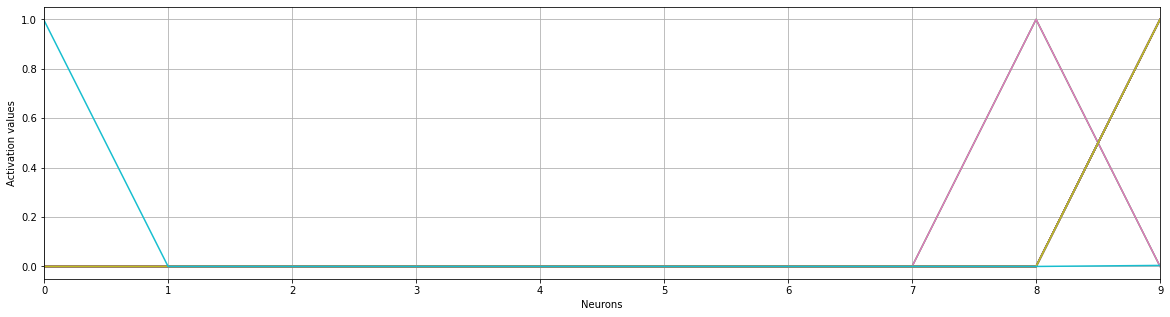

In [191]:
values14 = call_act(layer_num = 7, digit = 9, num_input_images = 20)

In [201]:
 model.predict_classes(x[9][200+19].reshape(1,28,28,1))

array([0], dtype=int64)

In [220]:

weights = model.get_weights()
print(type(weights))
layer6_weights = weights[6]
print(layer6_weights.shape)
digit_weights = layer6_weights[:,9]    #digit 9
neurons = np.array(range(32))
#plot_lines(neurons, digit_weights)
print(layer6_weights)

<class 'list'>
(32, 10)
[[-0.05187552  0.2323654   0.3851841   0.38999358 -0.39981064 -0.36000994
  -0.26402286  0.37281007 -0.33720455 -0.3075716 ]
 [-0.22724633  0.00573453 -0.3934717  -0.34348738 -0.3880329  -0.16299583
  -0.5659344   0.29750806 -0.00976899  0.22641422]
 [-0.096889   -0.30400425 -0.51084185 -0.261576    0.39622992 -0.24932116
  -0.33857685 -0.00381805  0.08484169  0.20591168]
 [-0.02180524  0.26112393  0.34775805 -0.18652198 -0.3796588   0.06786691
   0.23114748 -0.3841697  -0.28535926 -0.27793393]
 [-0.36977285  0.38731518  0.13684325  0.1162708   0.3322616  -0.12577243
  -0.51181597  0.23116845  0.1796779   0.46032396]
 [ 0.48236287 -0.3823636  -0.11121465 -0.24339665  0.01785558 -0.3683436
  -0.03539113  0.45496053 -0.42536196  0.07679839]
 [-0.13314864 -0.3320023   0.35620278  0.3534945  -0.00754324 -0.02286584
   0.02420758  0.00324634  0.06625032 -0.22525464]
 [ 0.404589    0.36107358 -0.25657937  0.32640994 -0.1232035   0.08919835
   0.02131512  0.14588456 -0

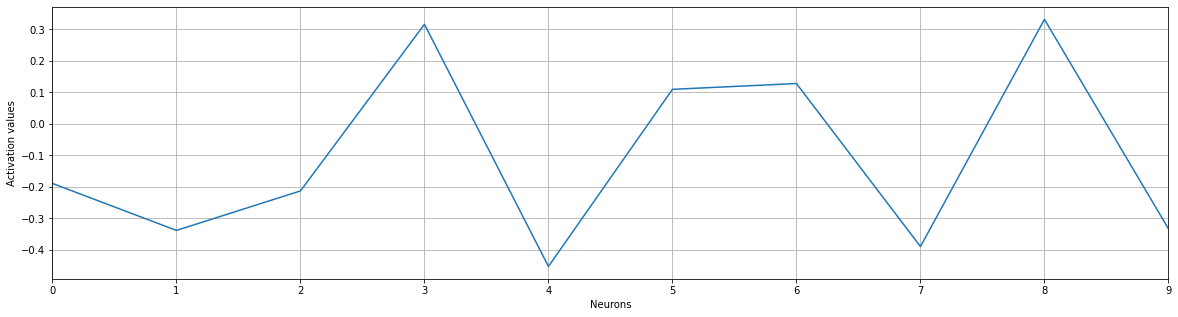

In [229]:
digits = np.array(range(10))
neuron28_weights = layer6_weights[8,]   #neuron 9
plot_lines(digits, neuron28_weights)
